# Second Hand Car Price Project

**With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some
cars are in demand hence making them costly and some are not in demand hence cheaper. One
of our clients works with small traders, who sell used cars. With the change in market due to covid
19 impact, our client is facing problems with their previous car price valuation machine learning
models. So, they are looking for new machine learning models from new data. We have to make
car price valuation model.**

# Importing the required libraries

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from heatmap import heatmap,corrplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [6]:
df=pd.read_csv('Second Car Price Final.csv')
df.head()

,City Name,Fuel type,Kilometer ran,Color,Owner type,Year of manufacture,Car Price,Car Name
0,Kanpur,Petrol,9400,White,First,2019,565000,Hyundai Grand i10
1,Hyderabad,Petrol,67971,Maroon,First,2014,400000,Hyundai i10
2,Mumbai,Diesel,18500,Grey,First,2018,3475000,MINI Countryman
3,Mumbai,Petrol,66700,White,First,2011,1258000,Mercedes-Benz C-Class
4,Thane,Diesel,117123,Black,First,2008,800000,BMW 5 Series


# Getting a basic outlook over the data

In [7]:
df.columns

Index(['City Name', 'Fuel type', 'Kilometer ran', 'Color', 'Owner type',
       'Year of manufacture', 'Car Price', 'Car Name'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5993 entries, 0 to 5992
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   City Name            5993 non-null   object
 1   Fuel type            5993 non-null   object
 2   Kilometer ran        5993 non-null   int64 
 3   Color                5993 non-null   object
 4   Owner type           5993 non-null   object
 5   Year of manufacture  5993 non-null   int64 
 6   Car Price            5993 non-null   int64 
 7   Car Name             5993 non-null   object
dtypes: int64(3), object(5)
memory usage: 374.7+ KB


In [9]:
df.tail()

,City Name,Fuel type,Kilometer ran,Color,Owner type,Year of manufacture,Car Price,Car Name
5988,Navi Mumbai,Diesel,31566,Grey,First,2016,575000,Ford Figo
5989,Delhi,Diesel,77000,White,First,2013,345000,Renault Duster
5990,Chennai,Diesel,58000,Gold,First,2012,950000,Toyota Innova
5991,Delhi,Diesel,108000,White,Second,2012,540000,Hyundai Santa Fe
5992,Hyderabad,Diesel,59712,White,First,2018,695000,Maruti Suzuki Swift Dzire


In [10]:
df['City Name'].replace('Navi Mumbai','Mumbai',inplace=True)

In [11]:
df.tail()

,City Name,Fuel type,Kilometer ran,Color,Owner type,Year of manufacture,Car Price,Car Name
5988,Mumbai,Diesel,31566,Grey,First,2016,575000,Ford Figo
5989,Delhi,Diesel,77000,White,First,2013,345000,Renault Duster
5990,Chennai,Diesel,58000,Gold,First,2012,950000,Toyota Innova
5991,Delhi,Diesel,108000,White,Second,2012,540000,Hyundai Santa Fe
5992,Hyderabad,Diesel,59712,White,First,2018,695000,Maruti Suzuki Swift Dzire


In [13]:
df['City Name'].unique()

array(['Kanpur', 'Hyderabad', 'Mumbai', 'Thane', 'Ghaziabad', 'Ahmedabad',
       'Kolkata', 'Chennai', 'Bangalore', 'Jalandhar', 'Nashik', 'Surat',
       'Akola', 'Bhopal', 'Delhi', 'Noida', 'Pune', 'Aurangabad',
       'Jaipur', 'Ambala Cantt', 'Dehradun', 'Karnal', 'Faridabad',
       'Lucknow', 'Jamshedpur', 'Coimbatore', 'Mohali', 'Ranchi',
       'Kottayam', 'Mirzapur', 'Pathanamthitta', 'Thiruvananthapuram',
       'Kochi', 'Meerut', 'Ambala City', 'Agra', 'Panchkula', 'Varanasi',
       'Ludhiana', 'Mangalore', 'Tiruchirappalli', 'Chandigarh',
       'Bhubaneswar', 'Raipur', 'Lakhimpur Kheri', 'Indore', 'Gurgaon',
       'Patna', 'Kozhikode', 'Samastipur', 'Kanyakumari', 'Kollam',
       'Nagpur', 'Zirakpur', 'Jammu'], dtype=object)

In [25]:
#Label encoding the dataset to draw the heatmap
df1=df.copy()

In [26]:
columns=['City Name', 'Fuel type', 'Color','Car Name']
le=LabelEncoder()
for i in columns:
    df1[i]=le.fit_transform(df1[i])

In [27]:
df1.head()

,City Name,Fuel type,Kilometer ran,Color,Owner type,Year of manufacture,Car Price,Car Name
0,23,5,9400,14,First,2019,565000,87
1,17,5,67971,8,First,2014,400000,102
2,38,1,18500,7,First,2018,3475000,140
3,38,5,66700,14,First,2011,1258000,186
4,50,1,117123,1,First,2008,800000,23


In [28]:
df1['Owner type'].value_counts()

First               4800
Second              1045
Third                107
UnRegistered Car      33
Fourth                 8
Name: Owner type, dtype: int64

In [29]:
df1.replace(['First','Second','Third','Fourth','Unregistered Car'],[1,2,3,4,0],inplace=True)

In [30]:
df1.head()

,City Name,Fuel type,Kilometer ran,Color,Owner type,Year of manufacture,Car Price,Car Name
0,23,5,9400,14,1,2019,565000,87
1,17,5,67971,8,1,2014,400000,102
2,38,1,18500,7,1,2018,3475000,140
3,38,5,66700,14,1,2011,1258000,186
4,50,1,117123,1,1,2008,800000,23


In [22]:
#creating the dictinary for remembering the label encoded values
le.fit(df['City Name'])
label_City_Name=dict(zip(range(len(le.classes_)),le.classes_))
le.fit(df['Fuel type'])
label_Fuel_type=dict(zip(range(len(le.classes_)),le.classes_))
le.fit(df['Color'])
label_Color=dict(zip(range(len(le.classes_)),le.classes_))
le.fit(df['Car Name'])
label_Car_Name=dict(zip(range(len(le.classes_)),le.classes_))

In [24]:
label_Fuel_type

{0: 'CNG', 1: 'Diesel', 2: 'Electric', 3: 'Hybrid', 4: 'LPG', 5: 'Petrol'}

# Exploratory Data Analysis

# Univariate Analysis

**1.City Name**

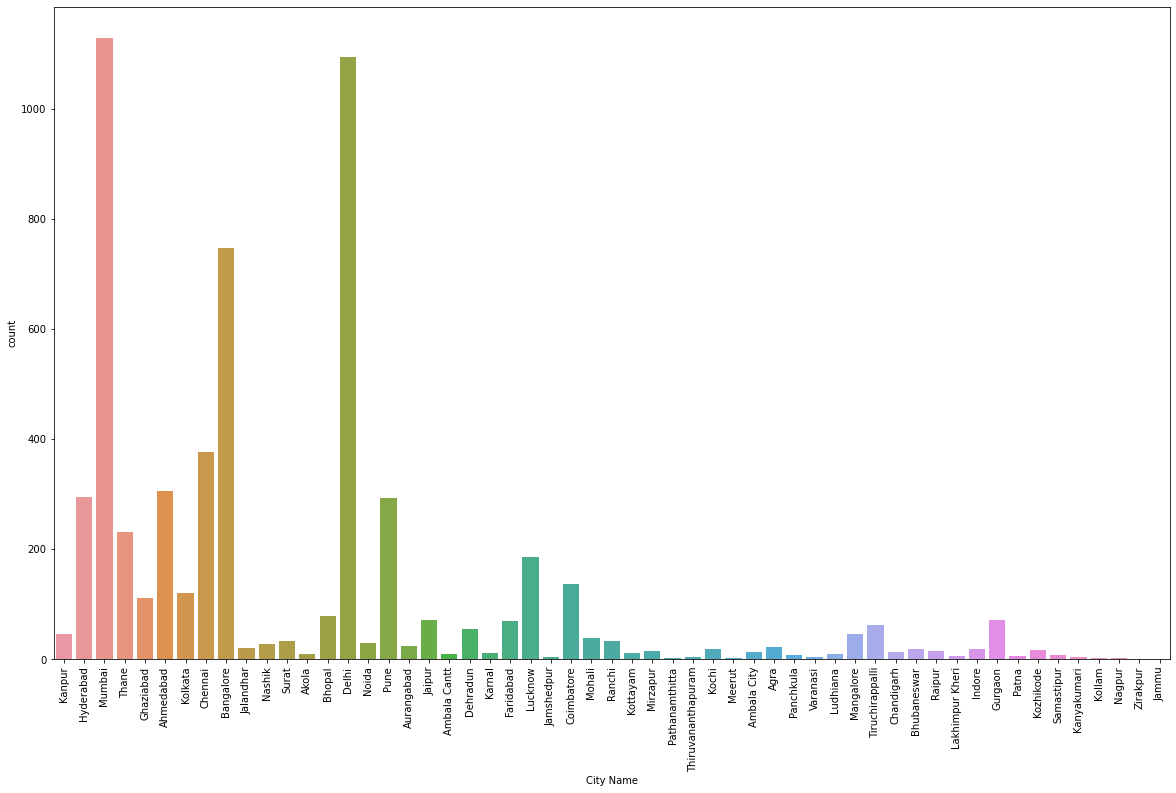

In [36]:
plt.figure(figsize=(20,12))
count1=sns.countplot(df['City Name'])
count1.set_xticklabels(count1.get_xticklabels(),rotation=90)
plt.savefig('statesdata.jpg')
plt.show()

Observations:
    
    1.Most of the second hand vehicles are from Mumbai, Delhi, Bangalore,and Chennai

**2.Fuel type**

<AxesSubplot:xlabel='Fuel type', ylabel='count'>

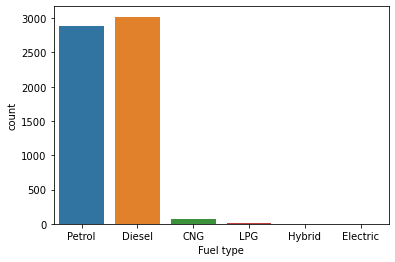

In [37]:
sns.countplot(df['Fuel type'])

Observations:
    
    1.Majority of the vehicle belongs to petrol or diesel type of fuel followed by CNG and LPG

**3.Kilometer ran**

<AxesSubplot:xlabel='Kilometer ran'>

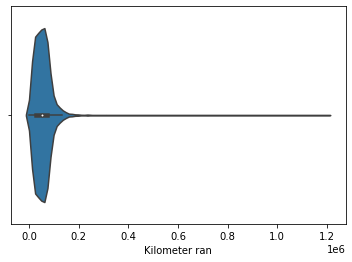

In [38]:
sns.violinplot(df['Kilometer ran'])

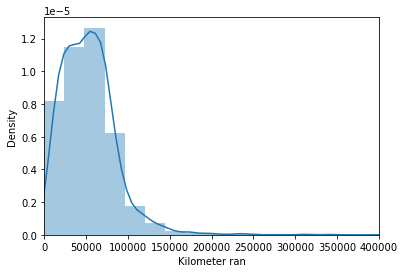

In [51]:
plt.figure()
sns.distplot(df['Kilometer ran'])
plt.xlim([0,400000])
plt.show()

In [52]:
df1.shape

(5993, 8)

In [57]:
df1.loc[(df1['Kilometer ran']<150000)].count()

City Name              5918
Fuel type              5918
Kilometer ran          5918
Color                  5918
Owner type             5918
Year of manufacture    5918
Car Price              5918
Car Name               5918
dtype: int64

Observations:
    
    1.From the above graphs and calculations we can see that 5918/5993 =98.75% of the vehilce just ran below 1.5 lakh kilometers.

**3.Color**

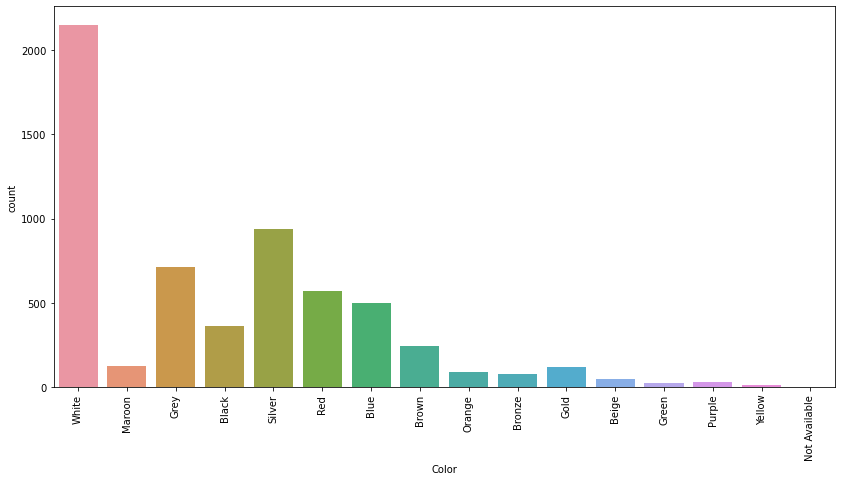

In [64]:
plt.figure(figsize=(14,7))
count1=sns.countplot(df['Color'])
count1.set_xticklabels(count1.get_xticklabels(),rotation=90)
plt.show()

Observations:
    
    1.Most of the cars are of white color followed by silver,grey,red,blue and back.

**5.Owner Type**

<AxesSubplot:xlabel='Owner type', ylabel='count'>

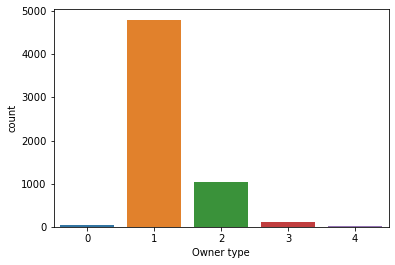

In [68]:
sns.countplot(df1['Owner type'])

In [70]:
df1.loc[(df1['Owner type']==1)].count()

City Name              4800
Fuel type              4800
Kilometer ran          4800
Color                  4800
Owner type             4800
Year of manufacture    4800
Car Price              4800
Car Name               4800
dtype: int64

Observations:
    
    1.80% of the vehicle belongs to single owner type

**6.Year of manufacture**

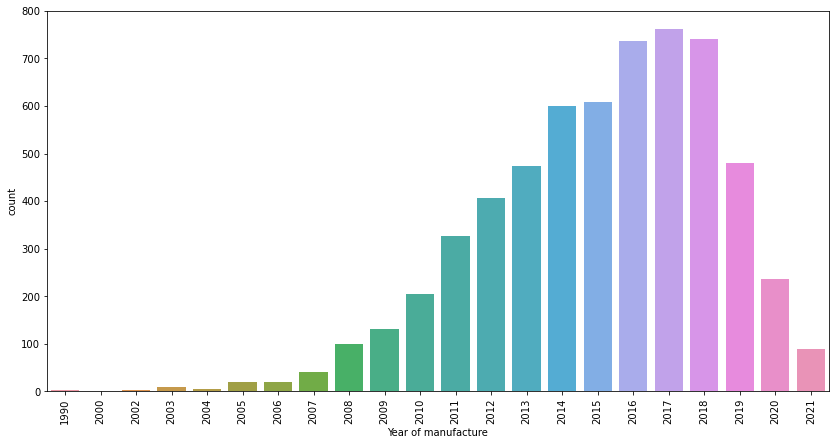

In [72]:
plt.figure(figsize=(14,7))
count1=sns.countplot(df1['Year of manufacture'])
count1.set_xticklabels(count1.get_xticklabels(),rotation=90)
plt.show()

Observations:
    
    1.Most of the vehicles are from 2016,2017 and 2018

**7.Car Price**

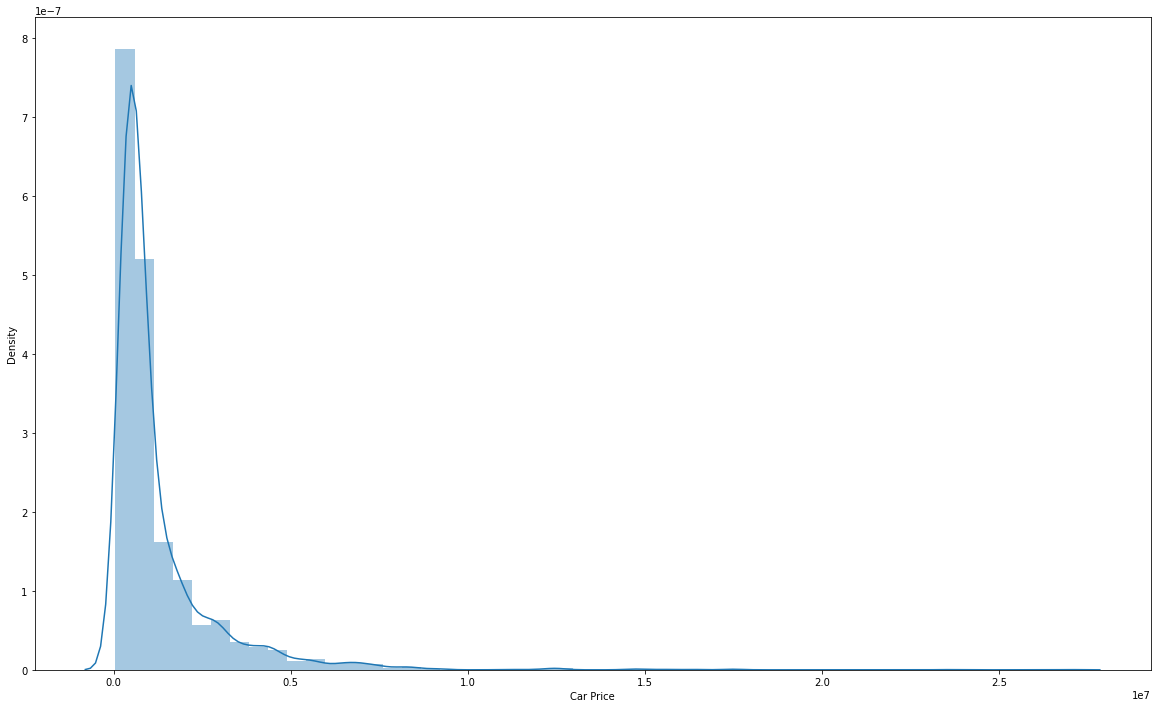

In [74]:
plt.figure(figsize=(20,12))
sns.distplot(df['Car Price'])
#plt.xlim([0,400000])
plt.show()

Observations:
    
    1.Majority of the vehicle price falls below 5 Lakh

In [78]:
df['Car Name'].replace('Mah','Mahendra',inplace=True)

In [79]:
df['Car Name'].value_counts()

 Mah                      300
 Honda City               186
 Maruti Suzuki Swift      180
 Hyundai Creta            179
 Hyundai Verna            164
                         ... 
 Audi A5 Cabriolet          1
 Skoda Kodiaq               1
 MINI Clubman               1
 Toyota Corolla             1
 Fiat Abarth 595            1
Name: Car Name, Length: 295, dtype: int64

# Multivariate Analysis

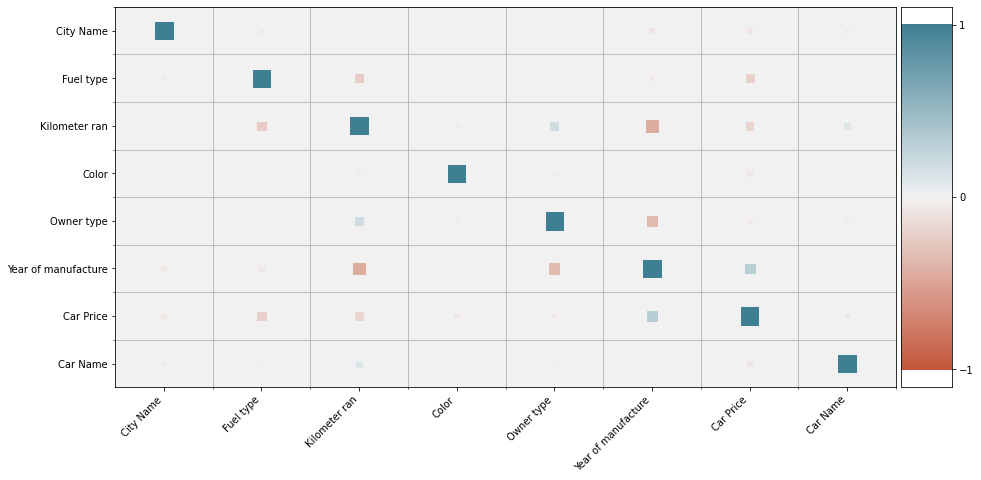

In [80]:
from heatmap import corrplot
plt.figure(figsize=(15,7))
corrplot(df1.corr(),size_scale=300)
plt.show()

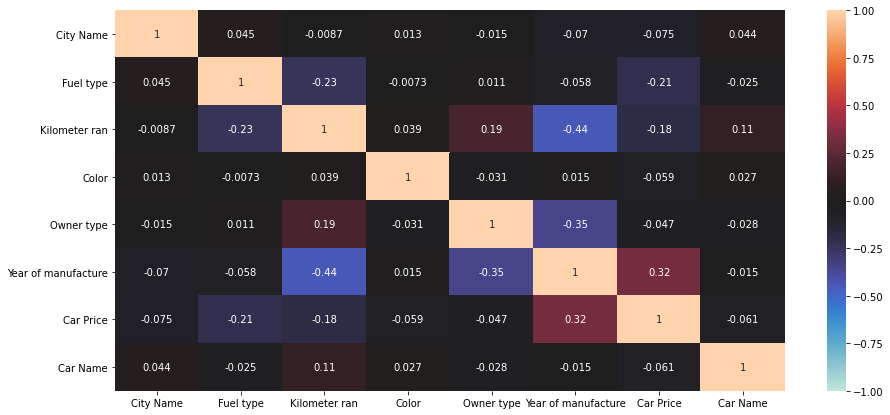

In [81]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:
    
    1.The price of the car significantly decided by year of manufacture,kilometer ran and fuel type
    2.There is a significant relationship between following pair of independent variables and has to be analysed in bi variate analysis.
        A.Kilometer ran vs Fuel type
        B.Owner type vs kilometer
        C.Year of manufacture vs Kilometer
        D.Year of manufacture vs ower type

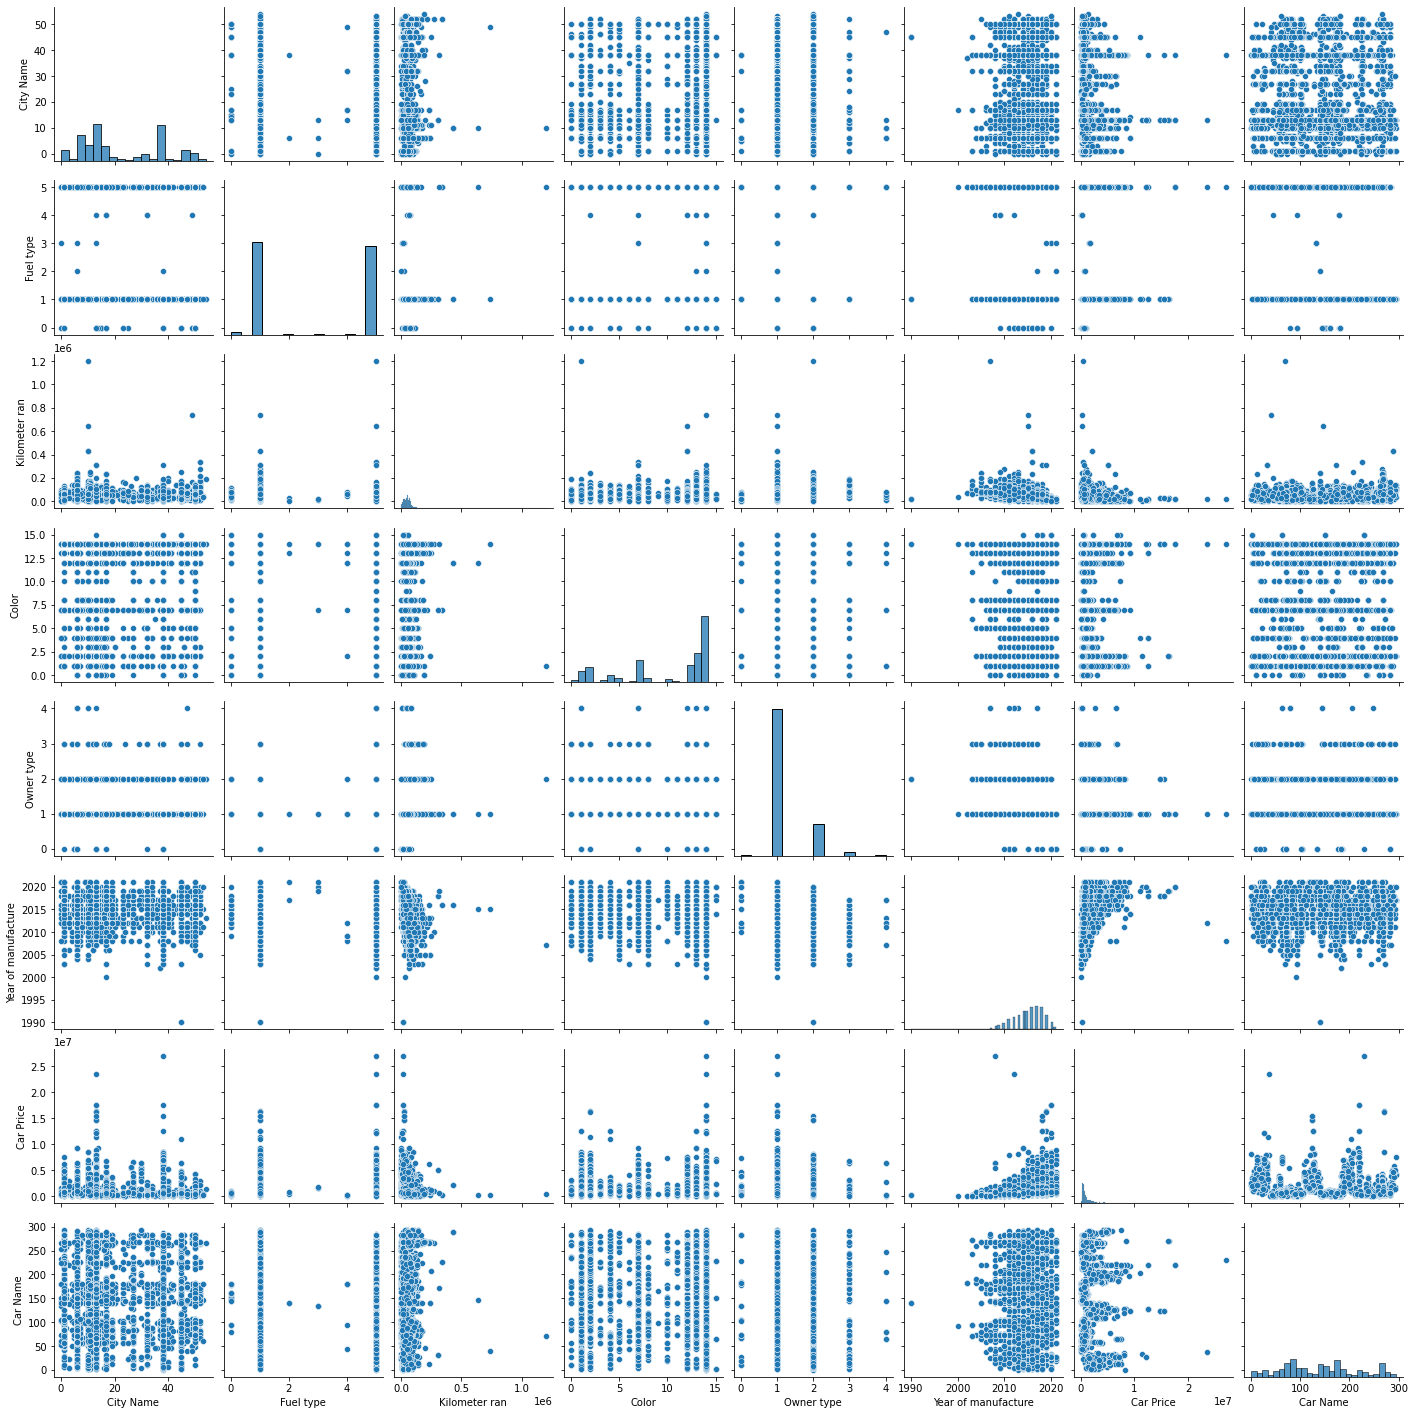

In [82]:
sns.pairplot(df1)

# Bi Variate Analysis

**1.Car Price vs Year of manufacture**

Text(0.5, 1.0, 'Year of manufacture vs Car Price')

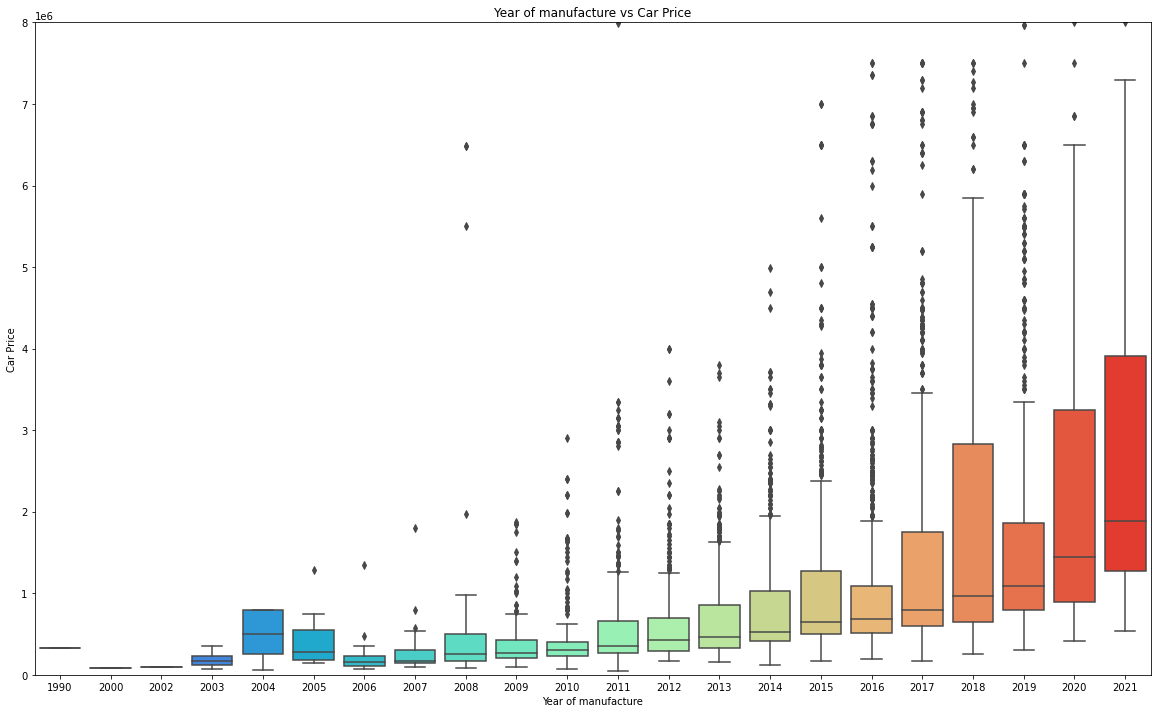

In [90]:
plt.figure(figsize=(20,12))
sns.boxplot(x='Year of manufacture',y='Car Price',data=df1, palette='rainbow')
plt.ylim([0,8000000])
plt.title("Year of manufacture vs Car Price")

Text(0.5, 1.0, 'Car price vs year of manufacture')

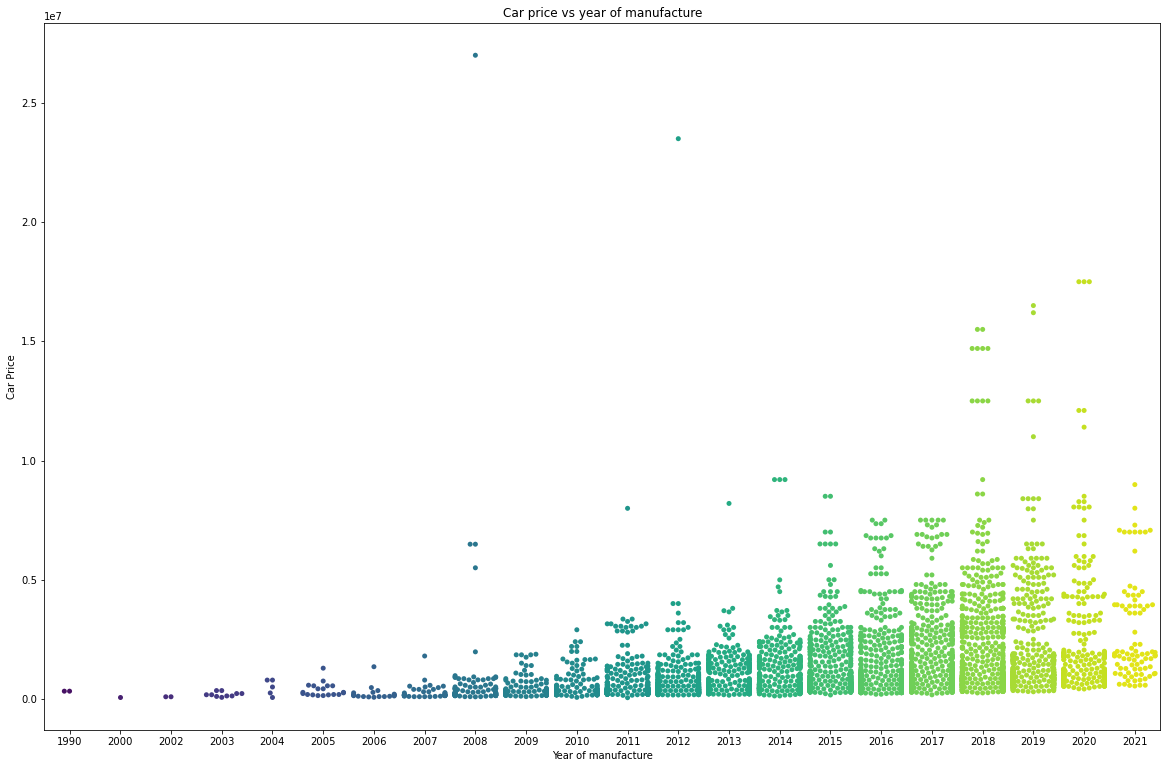

In [91]:
plt.figure(figsize=(20,13))
sns.swarmplot(x='Year of manufacture',y='Car Price',data=df1, dodge=True, palette='viridis')
plt.title("Car price vs year of manufacture")

Observations:
    
    1.From the above graphs we can conclude that as the year of manufacture is increases the price of the car also going to be increased.

**2.Car Price vs Kilometer ran**

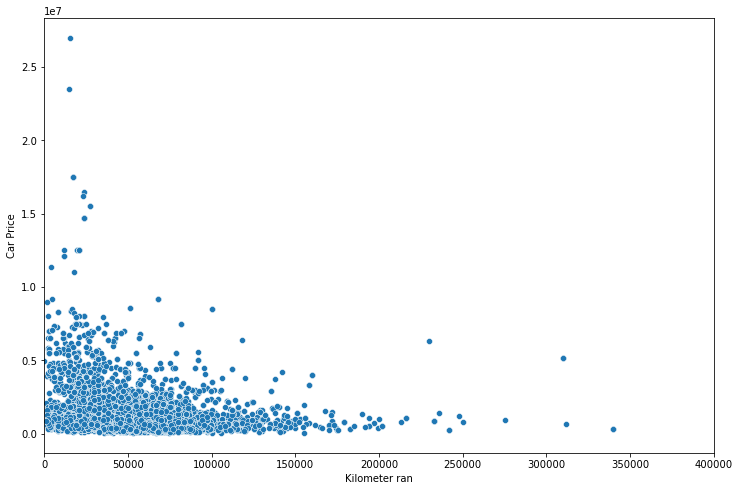

In [98]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Kilometer ran',y='Car Price',data=df1)
plt.xlim([0,400000])
#plt.ylim([0,2000000])
plt.show()

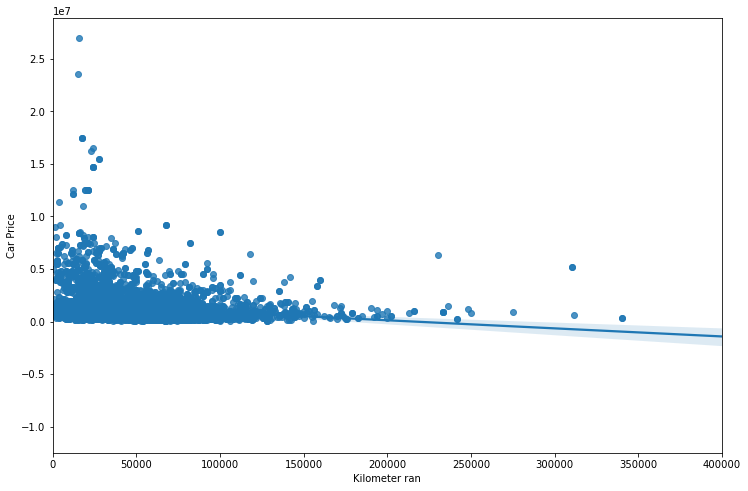

In [99]:
plt.figure(figsize=(12,8))
sns.regplot(x='Kilometer ran',y='Car Price',data=df1)
plt.xlim([0,400000])
#plt.ylim([0,2000000])
plt.show()

Observations:
    
    1.We can see that as kilometer increases the price of the car decreases.

**3.Car Price vs Fuel type**

Text(0.5, 1.0, 'car Price vs Fuel type')

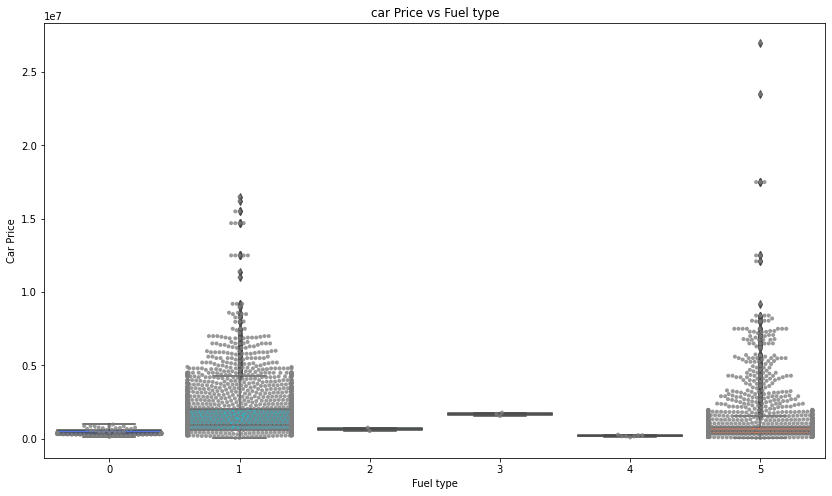

In [102]:
plt.figure(figsize=(14,8))
sns.boxplot(y='Car Price',x='Fuel type',data=df1, palette='rainbow')
sns.swarmplot(y='Car Price',x='Fuel type',data=df1, dodge=True ,alpha=.8,color='grey',s=4)
plt.title("car Price vs Fuel type")

Text(0.5, 1.0, 'Fuel type vs Car Price')

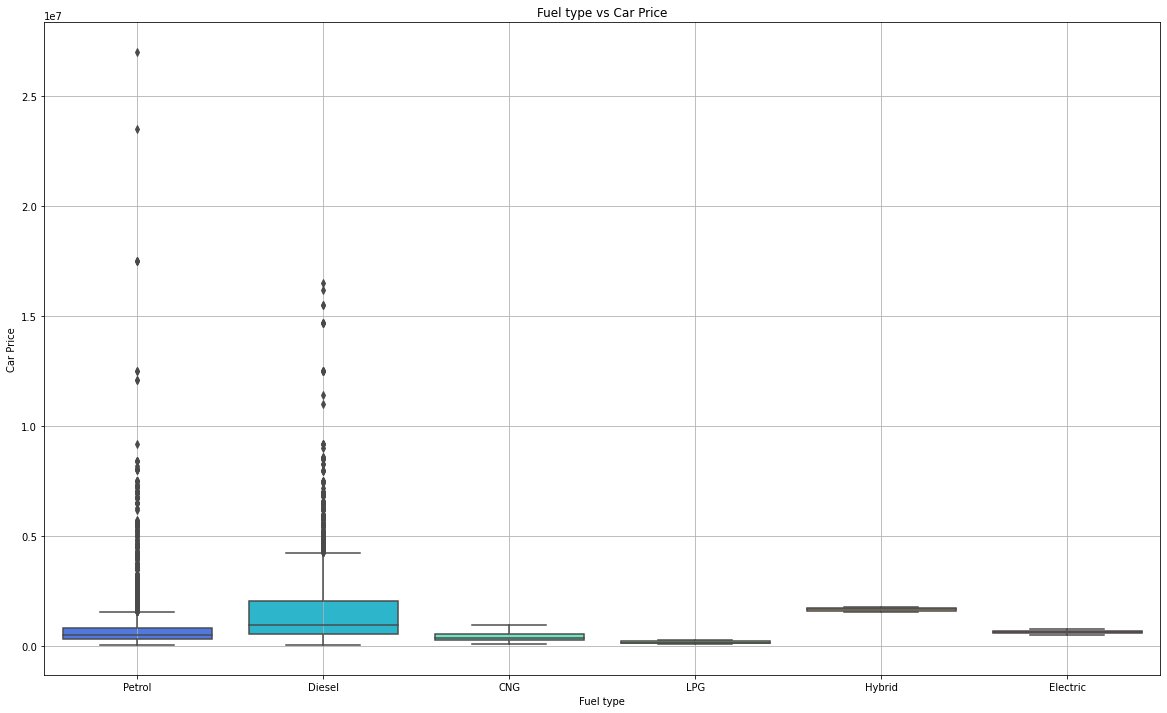

In [106]:
plt.figure(figsize=(20,12))
sns.boxplot(x='Fuel type',y='Car Price',data=df, palette='rainbow')
plt.grid()
plt.title("Fuel type vs Car Price")

Observations:
    
    1.Hybrid vehicle will have higher price followed by diesel,petrol and electric
    2.But most allmost all the heavy budget car will have diesel or petrol as their fuel type,so if we want to conclude in 
    general then diesel vehicle will have higher price followed by petrol.

**4.Kilometer ran vs Fuel type**

Text(0.5, 1.0, 'kilometer ran vs fuel type')

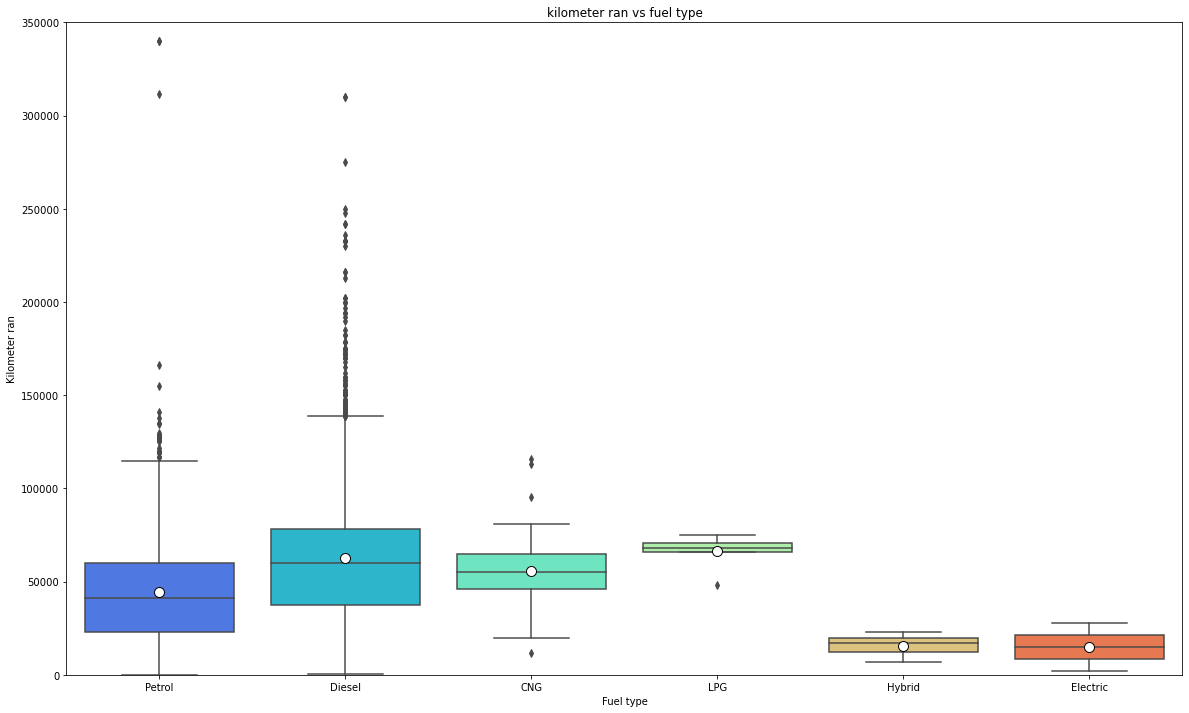

In [113]:
plt.figure(figsize=(20,12))
sns.boxplot(x='Fuel type',y='Kilometer ran',data=df, palette='rainbow',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylim([0,350000])
plt.title("kilometer ran vs fuel type")

Observations:
    
    1.From the above data we can conclude that Hybrid and electrical vehicle will ran very less kilometer before they get sold compared to LPG,CNG,Diesel and Petrol
    2.A diesel vehicle will get sold when it ran comapritively more km compared to petrol vehicle. 

**5.Owner type vs Kilometer ran**

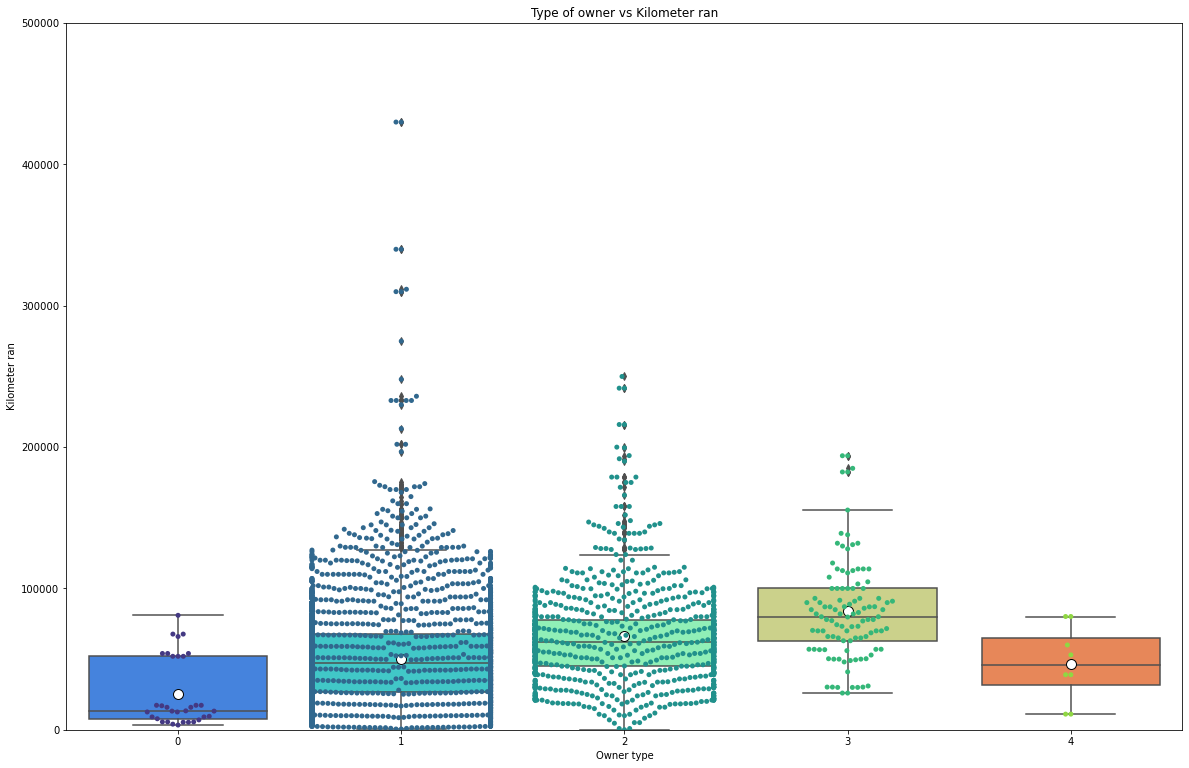

In [115]:
plt.figure(figsize=(20,13))
sns.swarmplot(x='Owner type',y='Kilometer ran',data=df1, dodge=True, palette='viridis')
sns.boxplot(x='Owner type',y='Kilometer ran',data=df1, palette='rainbow',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylim([0,500000])
plt.title("Type of owner vs Kilometer ran")
plt.show()

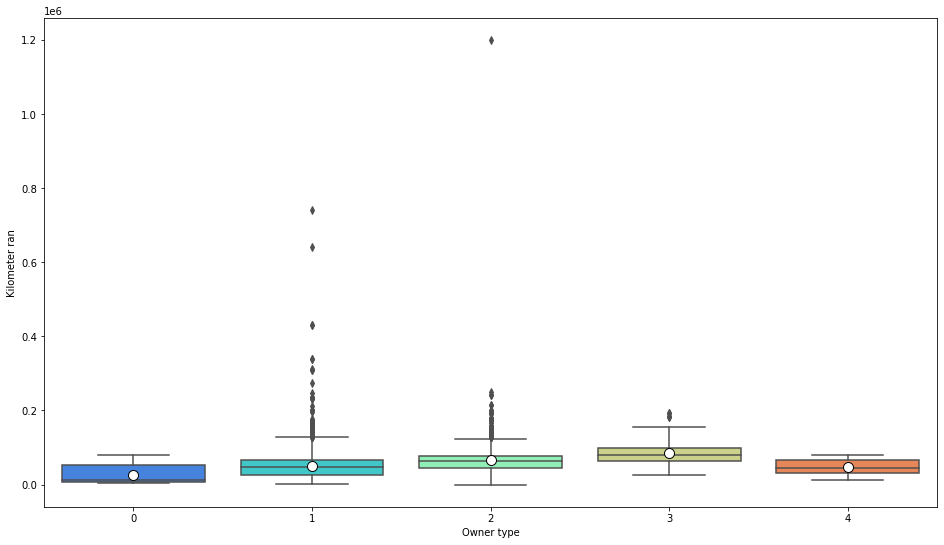

In [117]:
plt.figure(figsize=(16,9))
sns.boxplot(x='Owner type',y='Kilometer ran',data=df1, palette='rainbow',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

Observations:
    
    1.Most of the vehicle which ran maximum kilometer belongs to owner type of 1 or two.
    2.Generally we can say that as owner type increses from 0 to 3 the mean of kilometer ran will also get increased.

**6.Year of manufacture vs kilometer**

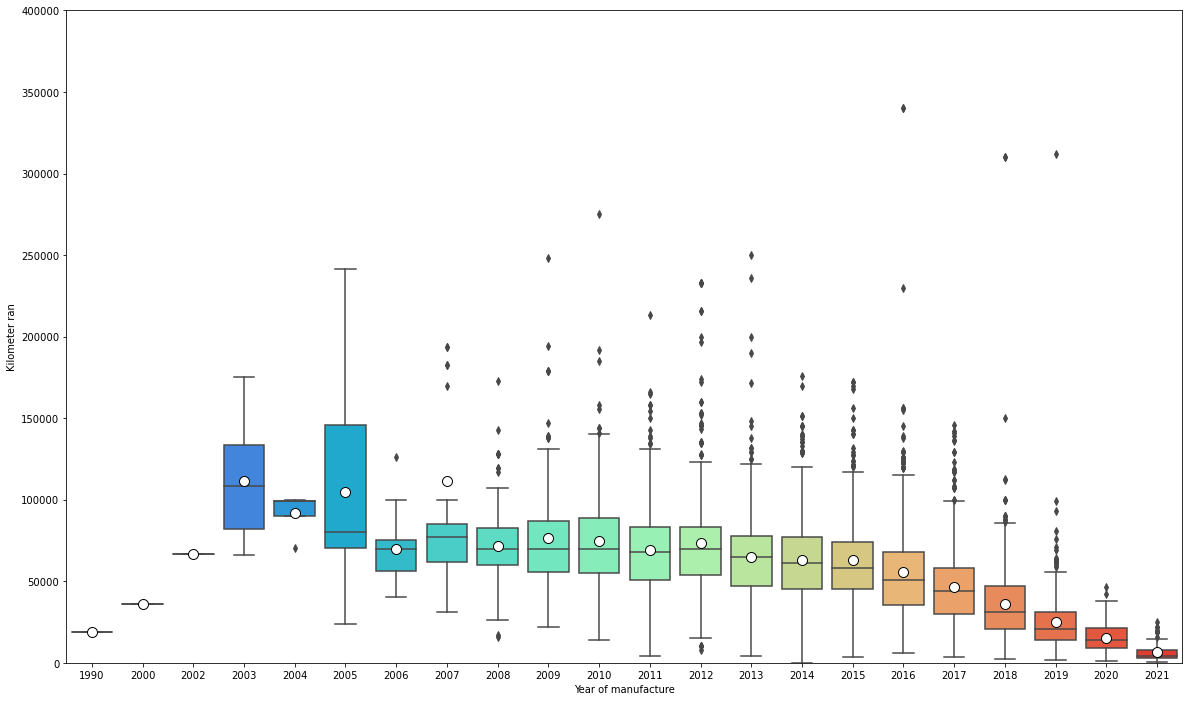

In [125]:
plt.figure(figsize=(20,12))
sns.boxplot(x='Year of manufacture',y='Kilometer ran',data=df1, palette='rainbow',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black","markersize":"10"})
plt.ylim([0,400000])
plt.savefig('Kilometrvs_yearm.jpg')
plt.show()

Observations:
    
    1.Above graph clearly indicates that as old as vehicle the kilometer will as get increased, It's an generally known             thing

**7.Year of manufacture vs Owner type**

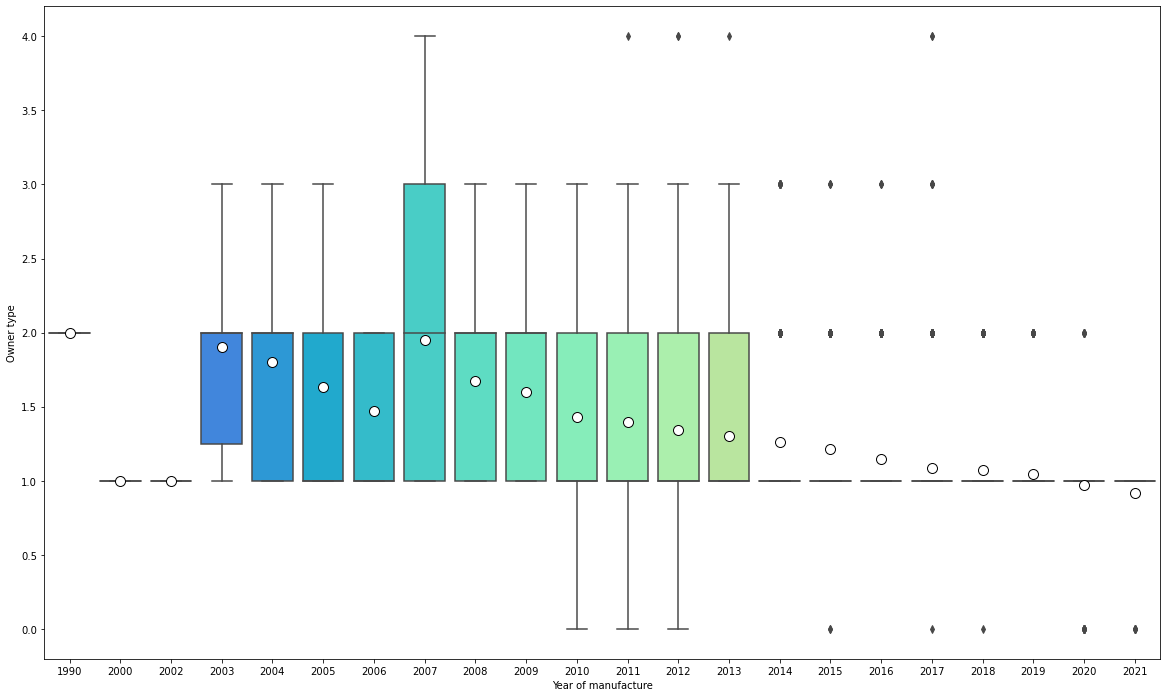

In [126]:
plt.figure(figsize=(20,12))
sns.boxplot(x='Year of manufacture',y='Owner type',data=df1, palette='rainbow',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black","markersize":"10"})
#plt.ylim([0,400000])
#plt.savefig('Kilometrvs_yearm.jpg')
plt.show()

In [127]:
df1['Owner type'].value_counts()

1    4800
2    1045
3     107
0      33
4       8
Name: Owner type, dtype: int64

Observations:
    
    1.From the above graphs we can see that as year increases the most of the vehicle is belongs to first owner type.

# Preparing different sets of datasets for model building

In [128]:
df.head()

,City Name,Fuel type,Kilometer ran,Color,Owner type,Year of manufacture,Car Price,Car Name
0,Kanpur,Petrol,9400,White,First,2019,565000,Hyundai Grand i10
1,Hyderabad,Petrol,67971,Maroon,First,2014,400000,Hyundai i10
2,Mumbai,Diesel,18500,Grey,First,2018,3475000,MINI Countryman
3,Mumbai,Petrol,66700,White,First,2011,1258000,Mercedes-Benz C-Class
4,Thane,Diesel,117123,Black,First,2008,800000,BMW 5 Series


In [129]:
df1.head()

,City Name,Fuel type,Kilometer ran,Color,Owner type,Year of manufacture,Car Price,Car Name
0,23,5,9400,14,1,2019,565000,87
1,17,5,67971,8,1,2014,400000,102
2,38,1,18500,7,1,2018,3475000,140
3,38,5,66700,14,1,2011,1258000,186
4,50,1,117123,1,1,2008,800000,23


In [131]:
dfh=df.copy()

In [132]:
dfh['City Name']=df1['City Name']

In [134]:
dfh['Car Name']=df1['Car Name']

In [137]:
#Remaining column we will do one hot encoding
dfh1 = pd.get_dummies(dfh, columns = ['Owner type', 'Color','Fuel type'])

In [135]:
dfh.head()

,City Name,Fuel type,Kilometer ran,Color,Owner type,Year of manufacture,Car Price,Car Name
0,23,Petrol,9400,White,First,2019,565000,87
1,17,Petrol,67971,Maroon,First,2014,400000,102
2,38,Diesel,18500,Grey,First,2018,3475000,140
3,38,Petrol,66700,White,First,2011,1258000,186
4,50,Diesel,117123,Black,First,2008,800000,23


In [138]:
dfh1.head()

,City Name,Kilometer ran,Year of manufacture,Car Price,Car Name,Owner type_First,Owner type_Fourth,Owner type_Second,Owner type_Third,Owner type_UnRegistered Car,...,Color_Red,Color_Silver,Color_White,Color_Yellow,Fuel type_CNG,Fuel type_Diesel,Fuel type_Electric,Fuel type_Hybrid,Fuel type_LPG,Fuel type_Petrol
0,23,9400,2019,565000,87,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,17,67971,2014,400000,102,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,18500,2018,3475000,140,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,38,66700,2011,1258000,186,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,50,117123,2008,800000,23,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Removing the outlier

In [139]:
from scipy.stats import zscore

In [155]:
# removing the outlier of df1 dataset
z=np.abs(zscore(df1))
threshold=3
df11=df1[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df1.shape[0]-df11.shape[0])/df1.shape[0])

percentage of loss of data by zscore is : 0.051393292174203235


Observations:
    
    Since data loss is less than 7% we can proceed further

In [141]:
# removing the outlier of one hot encoded dataset dfh1
z=np.abs(zscore(dfh1))
threshold=3
dfh2=dfh1[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(dfh1.shape[0]-dfh2.shape[0])/dfh1.shape[0])

percentage of loss of data by zscore is : 0.4091440013348907


Observations:
    
    1.The data loss is greater than 7% so we shouldn't go for it.

# Splitting the variables

In [156]:
# we have two datasets right now df11 and dfh1
#splitting the data of df11
x_df11=df11.drop('Car Price',axis=1)
y_df11=df11['Car Price']

#splitting the data of dfh1
x_dfh1=dfh1.drop('Car Price',axis=1)
y_dfh1=dfh1['Car Price']

In [163]:
#x_df11, y_df11
x_train,x_test,y_train,y_test=train_test_split(x_df11,y_df11,test_size=0.3,random_state=45)
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.263
RMSE: 933519.489
mean absolute error: 664649.541


In [164]:
#x_dfh1, y_dfh11
x_train,x_test,y_train,y_test=train_test_split(x_dfh1,y_dfh1,test_size=0.3,random_state=45)
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.218
RMSE: 1335057.242
mean absolute error: 820265.153


# Removal of skewness

In [157]:
x_df11.skew()

City Name              0.436207
Fuel type              0.045981
Kilometer ran          0.628973
Color                 -0.803353
Owner type             1.470378
Year of manufacture   -0.464915
Car Name               0.265117
dtype: float64

In [161]:
x_dfh1.skew()

City Name                       0.432158
Kilometer ran                   7.362109
Year of manufacture            -0.746369
Car Name                        0.251919
Owner type_First               -1.507697
Owner type_Fourth              27.322152
Owner type_Second               1.716858
Owner type_Third                7.283823
Owner type_UnRegistered Car    13.367911
Color_Beige                    10.813276
Color_Black                     3.697573
Color_Blue                      3.025452
Color_Bronze                    8.833915
Color_Brown                     4.660009
Color_Gold                      6.885153
Color_Green                    16.417908
Color_Grey                      2.351931
Color_Maroon                    6.736059
Color_Not Available            54.726589
Color_Orange                    8.169089
Color_Purple                   13.578620
Color_Red                       2.767597
Color_Silver                    1.887682
Color_White                     0.587618
Color_Yellow    

In [162]:
from sklearn.preprocessing import PowerTransformer

In [165]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
x_dfh1s = power.fit_transform(x_dfh1)

In [166]:
#x_dfh1s, y_dfh11
x_train,x_test,y_train,y_test=train_test_split(x_dfh1s,y_dfh1,test_size=0.3,random_state=45)
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : -2.333475855839071e+25
RMSE: 7.294991532664143e+18
mean absolute error: 2.4330158954011242e+17


Observations:
    
    1.Dont go for power transfer

# Standard scaling

In [ ]:
#x_df11, y_df11

#x_dfh1, y_dfh11

In [167]:
from sklearn import preprocessing

In [168]:
#out of all the x sets of data x_df11 and x_dfh1 are performing well
#lets apply all techniques of scaling over x_df11
scaler = preprocessing.RobustScaler()
robust_x_df11 = scaler.fit_transform(x_df11)

 
scaler = preprocessing.StandardScaler()
standard_x_df11 = scaler.fit_transform(x_df11)

 
scaler = preprocessing.MinMaxScaler()
minmax_x_df11 = scaler.fit_transform(x_df11)


In [170]:
#robust_x_df11, y_dfh11
x_train,x_test,y_train,y_test=train_test_split(robust_x_df11,y_df11,test_size=0.3,random_state=45)
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.263
RMSE: 933519.489
mean absolute error: 664649.541


In [171]:
#standard_x_df11, y_dfh11
x_train,x_test,y_train,y_test=train_test_split(standard_x_df11,y_df11,test_size=0.3,random_state=45)
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.263
RMSE: 933519.489
mean absolute error: 664649.541


In [172]:
#minmax_x_df11, y_dfh11
x_train,x_test,y_train,y_test=train_test_split(minmax_x_df11,y_df11,test_size=0.3,random_state=45)
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.263
RMSE: 933519.489
mean absolute error: 664649.541


In [173]:
#lets apply all techniques of scaling over x_dfh1
scaler = preprocessing.RobustScaler()
robust_x_dfh1 = scaler.fit_transform(x_dfh1)

 
scaler = preprocessing.StandardScaler()
standard_x_dfh1 = scaler.fit_transform(x_dfh1)

 
scaler = preprocessing.MinMaxScaler()
minmax_x_dfh1 = scaler.fit_transform(x_dfh1)

In [174]:
#robust_x_dfh1, y_dfh11
x_train,x_test,y_train,y_test=train_test_split(robust_x_dfh1,y_dfh1,test_size=0.3,random_state=45)
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.218
RMSE: 1335057.242
mean absolute error: 820265.153


In [175]:
#standard_x_dfh1, y_dfh11
x_train,x_test,y_train,y_test=train_test_split(standard_x_dfh1,y_dfh1,test_size=0.3,random_state=45)
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : -3.432814034227386e+20
RMSE: 2.7980036379965148e+16
mean absolute error: 933186461166296.4


In [176]:
#minmax_x_dfh1, y_dfh11
x_train,x_test,y_train,y_test=train_test_split(minmax_x_dfh1,y_dfh1,test_size=0.3,random_state=45)
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.218
RMSE: 1335057.242
mean absolute error: 820265.153


**Our final inputs for the model is standard_x_df11,y_df11**

# Building the model

In [179]:
x_train,x_test,y_train,y_test=train_test_split(standard_x_df11,y_df11,test_size=0.3,random_state=45)

In [181]:
maxAccu=0
ln=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(standard_x_df11,y_df11,test_size=0.3,random_state=i)
    mod=ln
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.29360257114507027 on random state 19


In [182]:
x_train,x_test,y_train,y_test=train_test_split(standard_x_df11,y_df11,test_size=0.3,random_state=19)

In [183]:
print('x train shape:',x_train.shape)
print('x test shape',x_test.shape)
print('\n')
print('y train shape:',y_train.shape)
print('y test shape',y_test.shape)

x train shape: (3979, 7)
x test shape (1706, 7)


y train shape: (3979,)
y test shape (1706,)


In [184]:
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.294
RMSE: 926224.164
mean absolute error: 663527.011


In [191]:
#lasso model
ls=Lasso(alpha=19)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predls)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predls)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predls)),3))

r2 score is : 0.294
RMSE: 926228.03
mean absolute error: 663525.904


In [192]:
#Ridge model
rd=Ridge(alpha=0.01)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrd)),3))

r2 score is : 0.294
RMSE: 926224.265
mean absolute error: 663526.962


In [195]:
#ElasticNet model
enr=ElasticNet(alpha=0.001)
enr.fit(x_train,y_train)
predenr=enr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predenr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predenr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predenr)),3))

r2 score is : 0.294
RMSE: 926244.339
mean absolute error: 663517.293


In [196]:
ran = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
ran.fit(x_train, y_train)
predran=ran.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predran)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predran)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predran)),3))

r2 score is : -0.145
RMSE: 1179178.407
mean absolute error: 647147.741


In [197]:
svr = SVR()
svr.fit(x_train, y_train)
predran=svr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predran)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predran)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predran)),3))

r2 score is : -0.155
RMSE: 1184273.317
mean absolute error: 687844.552


In [198]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf)),3))

r2 score is : 0.906
RMSE: 338565.676
mean absolute error: 160447.044


# Computing the cross validation scores

In [199]:
models=[ln,ls,rd,enr,ran,svr,rf]
for m in models:
    
    score=cross_val_score(m,standard_x_df11,y_df11,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LinearRegression() score is:
0.246


Lasso(alpha=19) score is:
0.246


Ridge(alpha=0.01) score is:
0.246


ElasticNet(alpha=0.001) score is:
0.246


RANSACRegressor(base_estimator=LinearRegression()) score is:
-0.111


SVR() score is:
-0.153


RandomForestRegressor() score is:
0.845




**The difference between accuracy and cross validation is less for random forest regressor, so it is the best model**

# Hyper parameter tuning

In [200]:
rf=RandomForestRegressor()
grid_param={
    'criterion':['mse','mae'],
    
    'max_depth':[10,20,30,40,50],
    'max_features':['auto', 'sqrt', 'log2'],
    'min_samples_split':[2,5,10,15,20],
    'bootstrap':[True,False]
}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='r2',
                  cv=5)

gd_sr.fit(standard_x_df11,y_df11)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 40, 'max_features': 'auto', 'min_samples_split': 2}
0.8492758480344834


In [201]:
rf1=RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=40,max_features='auto',min_samples_split=2,bootstrap=True)

In [202]:
rf1.fit(x_train, y_train)
predrf1=rf1.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf1)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf1)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf1)),3))

r2 score is : 0.905
RMSE: 340519.281
mean absolute error: 163461.619


# Saving the model

In [203]:
import joblib
joblib.dump(rf1,'second_hand_car.obj')

['second_hand_car.obj']